In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
states = np.zeros(25) #(5*5) Grid 
actions = ['up', 'down', 'left', 'right', 'stay']
r_forbidden, r_boundary = -1, -1
r_target = 1
discount_factor_gamma = 0.2
forbidden_states = [12, 16]
target_state = 7

In [17]:
def get_next_state_and_reward(current_state, action):
    row = current_state // 5
    col = current_state % 5

    # Initialize next position
    next_row, next_col = row, col

    # Check each action and if it would hit boundary
    if action == 'up':
        if row == 0:  # Would hit top boundary
            return current_state, r_boundary
        next_row = row - 1
    elif action == 'down':
        if row == 4:  # Would hit bottom boundary
            return current_state, r_boundary
        next_row = row + 1
    elif action == 'left':
        if col == 0:  # Would hit left boundary
            return current_state, r_boundary
        next_col = col - 1
    elif action == 'right':
        if col == 4:  # Would hit right boundary
            return current_state, r_boundary
        next_col = col + 1

    next_state = next_row * 5 + next_col

    # Check if next state is target or forbidden
    if next_state == target_state:  # target state
        return next_state, r_target
    elif next_state in forbidden_states:  # forbidden state (example)
        return next_state, r_forbidden

    return next_state, 0

In [18]:
def value_iteration(max_iterations=100, threshold=0.001):
    V = np.zeros(25)
    for iteration in range(max_iterations):
        V_prev = V.copy()
        delta = 0

        for state in range(25):
            if state == target_state:  # If target state, skip
                continue

            # Calculate value for each action
            action_values = []
            for action in actions:
                next_state, reward = get_next_state_and_reward(state, action)
                value = reward + discount_factor_gamma * V_prev[next_state]
                action_values.append(value)

            # Update state value with maximum action value
            V[state] = max(action_values)
            delta = max(delta, abs(V[state] - V_prev[state]))

        if delta < threshold:
            print(f"Converged after {iteration + 1} iterations")
            break

    return V

In [19]:
# Run value iteration
optimal_values = value_iteration()

# Reshape to 5x5 grid for better visualization
grid_values = optimal_values.reshape(5, 5)
print("\nOptimal Values:")
print(grid_values)

Converged after 7 iterations

Optimal Values:
[[0.25    0.5     1.      0.5     0.25   ]
 [0.5     1.      0.      1.      0.5    ]
 [0.25    0.5     1.      0.5     0.25   ]
 [0.125   0.25    0.125   0.25    0.125  ]
 [0.0625  0.03125 0.0625  0.125   0.0625 ]]


# Visualizing the **pathways**

In [11]:
import matplotlib.pyplot as plt

In [20]:
def get_optimal_policy(V):
    policy = np.zeros(25, dtype=str)

    for state in range(25):
        if state == target_state:  # target state
            policy[state] = 'T'
            continue
        if state in forbidden_states:  # forbidden state
            policy[state] = 'F'
            continue

        # Find the best action for this state
        best_value = float('-inf')
        best_action = ''

        for action in actions:
            next_state, reward = get_next_state_and_reward(state, action)
            value = reward + discount_factor_gamma * V[next_state]

            if value > best_value:
                best_value = value
                best_action = action

        # Convert action to arrow symbol
        if best_action == 'up': policy[state] = '↑'
        elif best_action == 'down': policy[state] = '↓'
        elif best_action == 'left': policy[state] = '←'
        elif best_action == 'right': policy[state] = '→'
        elif best_action == 'stay': policy[state] = '•'

    return policy.reshape(5, 5)

In [21]:
def visualize_grid_world(V, policy):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Create the grid
    values = V.reshape(5, 5)
    im = ax.imshow(values, cmap='RdYlGn')
    plt.colorbar(im)

    # Add value text and arrows to each cell
    for i in range(5):
        for j in range(5):
            # Add state value
            text = f'{values[i, j]:.2f}'

            if policy[i, j] == 'F':
                ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, color='red', alpha=0.3))
                ax.text(j, i, f'{text}\nFORBIDDEN', ha='center', va='center')
            elif policy[i, j] == 'T':
                ax.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, color='green', alpha=0.3))
                ax.text(j, i, f'{text}\nTARGET', ha='center', va='center')
            else:
                # Add both value and arrow
                ax.text(j, i-0.2, text, ha='center', va='center')
                ax.text(j, i+0.2, policy[i, j], ha='center', va='center', fontsize=20)

    # Add grid lines
    ax.grid(True, color='black', linewidth=2)
    ax.set_xticks(np.arange(-.5, 5, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 5, 1), minor=True)
    ax.grid(True, which='minor', color='black', linewidth=2)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])

    plt.title('Grid World: State Values and Optimal Policy')
    plt.tight_layout()
    plt.show()

Converged after 8 iterations


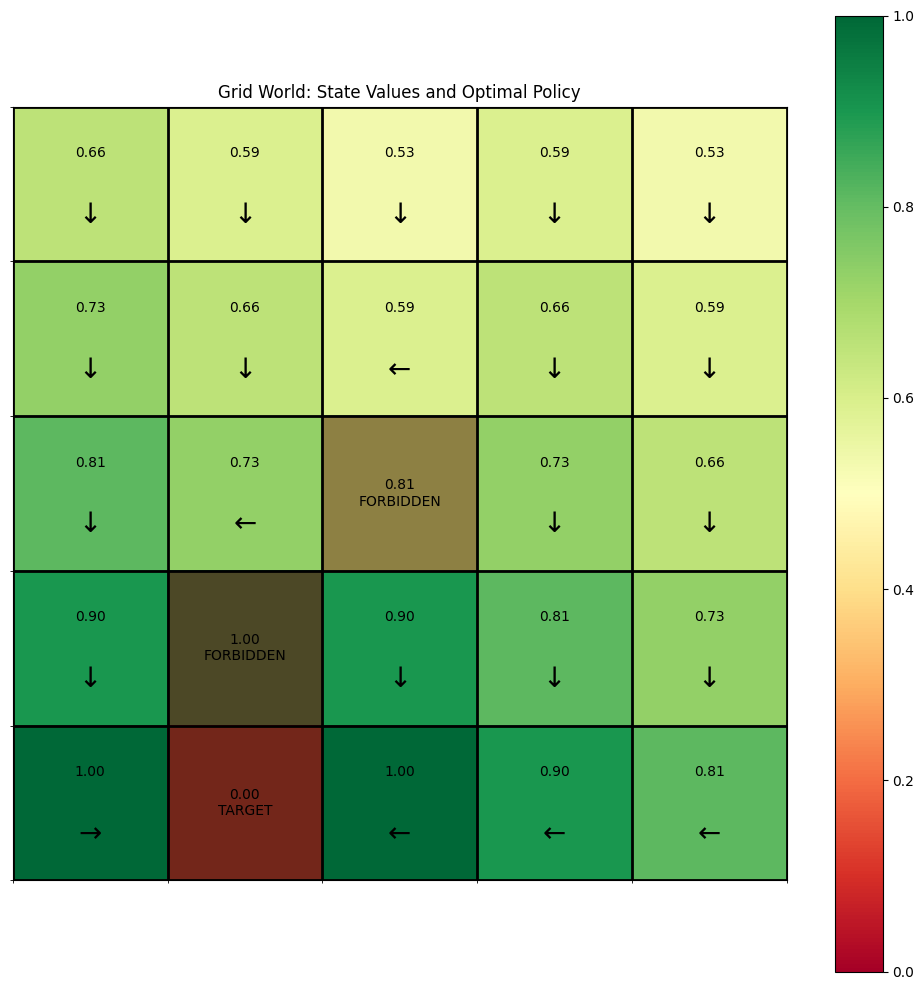

In [36]:
# Run value iteration
optimal_values = value_iteration()

# Get optimal policy
optimal_policy = get_optimal_policy(optimal_values)

# Visualize
visualize_grid_world(optimal_values, optimal_policy)

Converged after 7 iterations


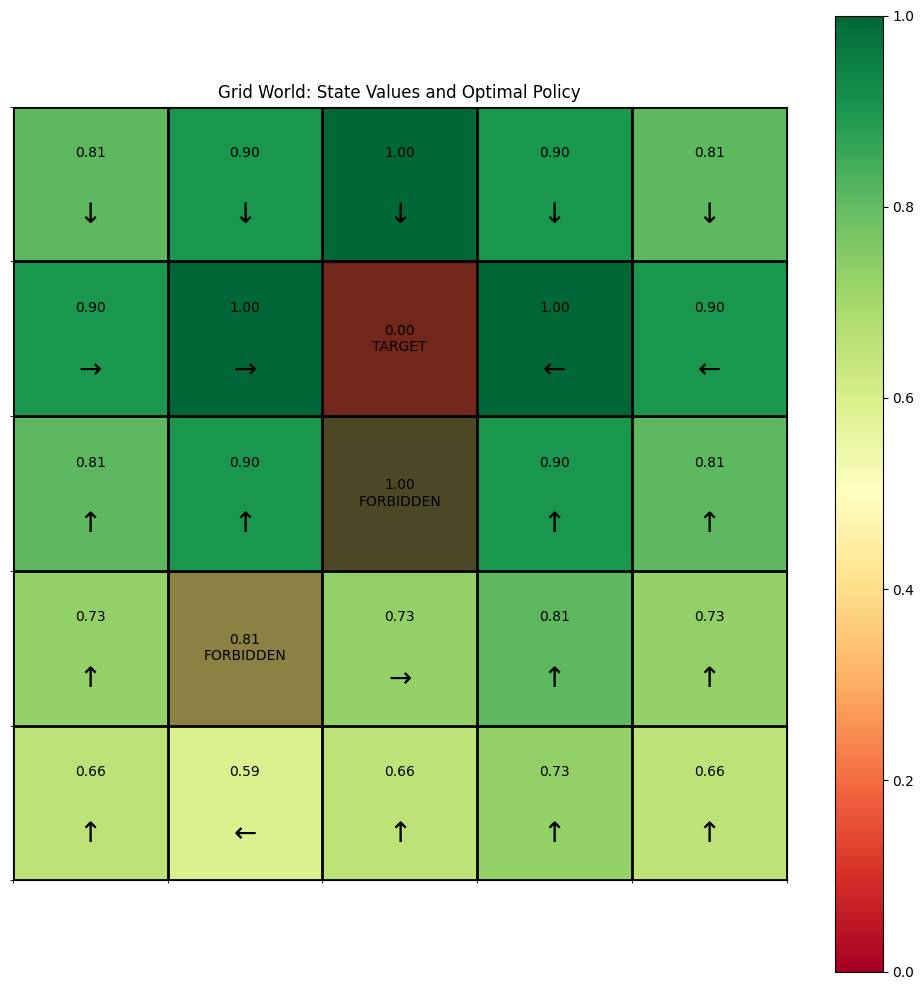

In [14]:
#Gamma was set at 0,9

# Run value iteration
optimal_values = value_iteration()

# Get optimal policy
optimal_policy = get_optimal_policy(optimal_values)

# Visualize
visualize_grid_world(optimal_values, optimal_policy)

Converged after 7 iterations


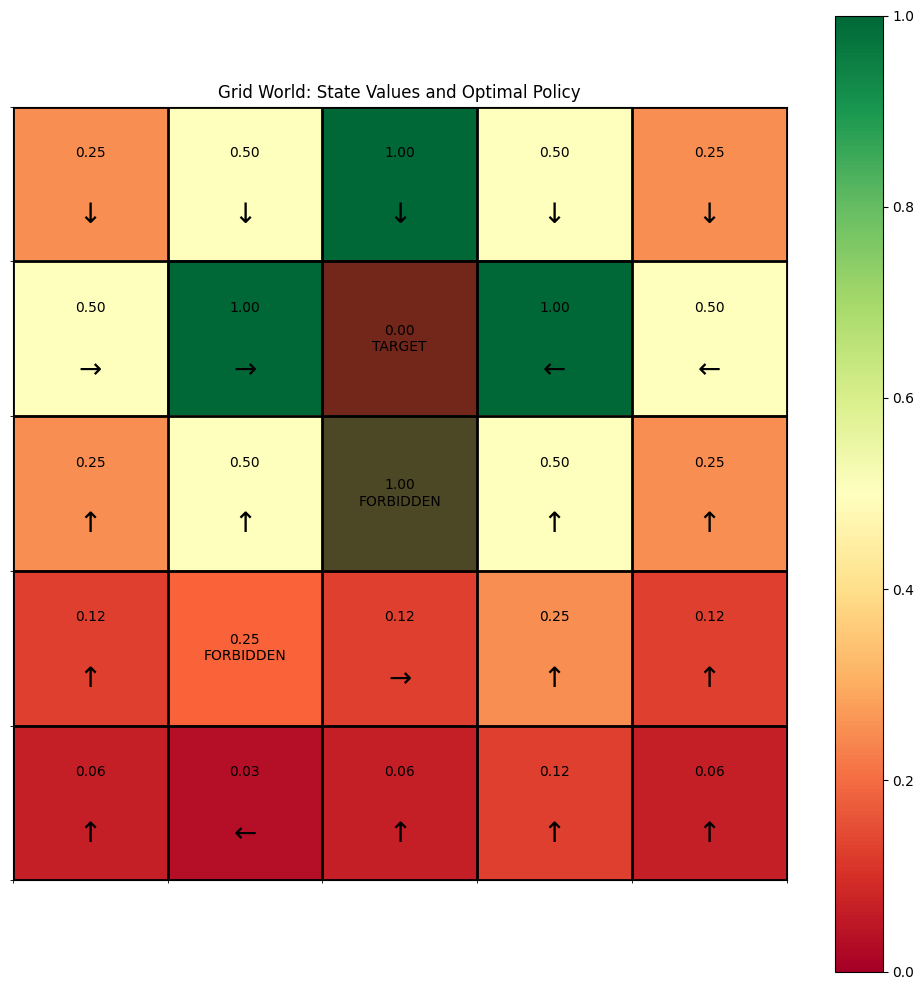

In [22]:
#Gamma was set at 0.5

# Run value iteration
optimal_values = value_iteration()

# Get optimal policy
optimal_policy = get_optimal_policy(optimal_values)

# Visualize
visualize_grid_world(optimal_values, optimal_policy)

Converged after 6 iterations


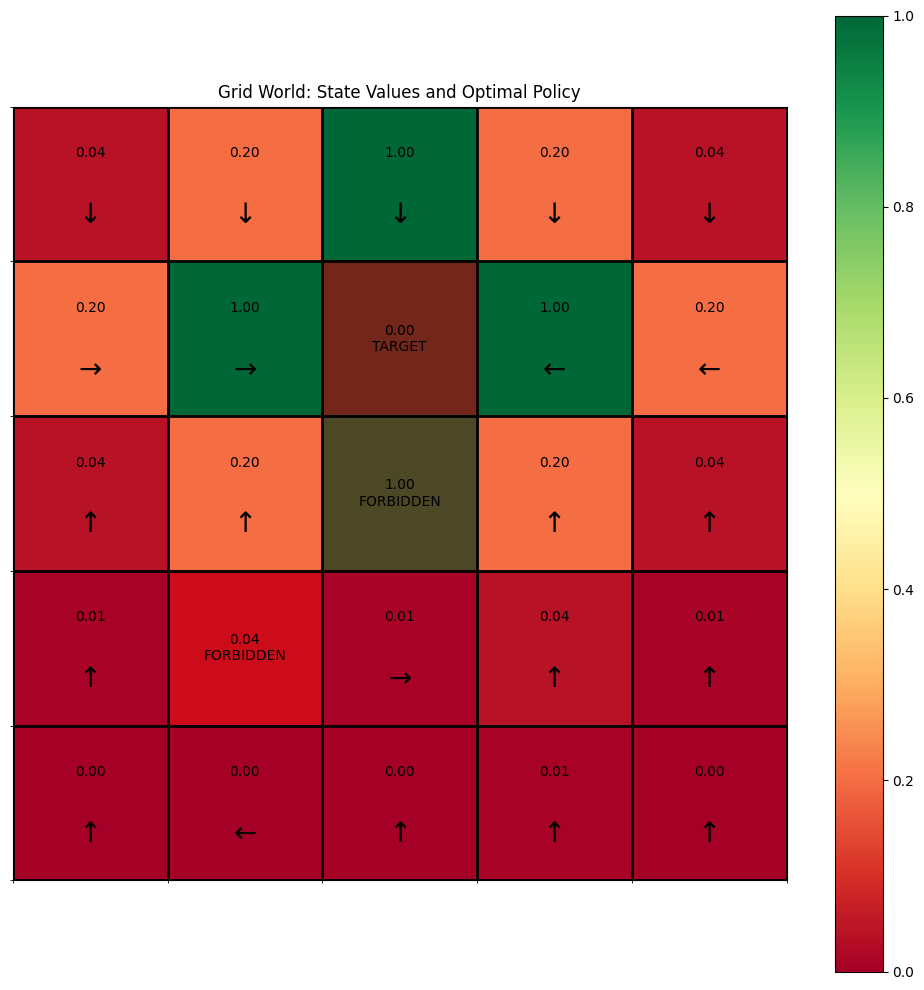

In [24]:
#Gamma was set at 0.2

# Run value iteration
optimal_values = value_iteration()

# Get optimal policy
optimal_policy = get_optimal_policy(optimal_values)

# Visualize
visualize_grid_world(optimal_values, optimal_policy)